In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle 
from os import path

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import *
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report


from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [44]:
#MULTI-CLASS CLASSIFICATION

In [2]:
train = pd.read_csv("E:/LEI 5/TCC/Monografia/dataset/UNSW-NB15/Project TCC/multi_data")
test = pd.read_csv("E:/LEI 5/TCC/Monografia/dataset/UNSW-NB15/UNSW_NB15_testing-set.csv")

In [44]:
#Data Splitting

X = train.drop(columns=['label'],axis=1)
y = train['label']

In [45]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE oversampling to the training set
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# Print the class distribution before and after oversampling
print("Class distribution before oversampling:")
print(pd.Series(y_train).value_counts())

print("Class distribution after oversampling:")
print(pd.Series(y_train_oversampled).value_counts())


Class distribution before oversampling:
5    31668
6    15623
3    12878
2     1424
4     1376
7     1364
0      438
8       85
1       82
Name: label, dtype: int64
Class distribution after oversampling:
5    31668
3    31668
6    31668
7    31668
2    31668
0    31668
4    31668
8    31668
1    31668
Name: label, dtype: int64


In [46]:
X_train_oversampled.shape , y_train_oversampled.shape

((285012, 15), (285012,))

In [1]:
print("---------------------------------(XGBoost)---------------------------------")

---------------------------------(XGBoost)---------------------------------


In [58]:
import xgboost, lightgbm 
from mlxtend.classifier import EnsembleVoteClassifier

XGB = xgboost.XGBClassifier(n_estimators=150, n_jobs=-1)

XGB.fit(X_train_oversampled, y_train_oversampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [59]:
XGB.score(X_train_oversampled, y_train_oversampled)

0.9017444879513845

In [60]:
acc = XGB.score(X_test,y_test)

#print("Accuracy: %0.5f for the %s" % (acc))
print ("Accuracy is {}".format(round(acc,5)))

Accuracy is 0.966


In [61]:
XGB_pred = XGB.predict(X_test)

In [62]:
from sklearn import metrics 

print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, XGB_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, XGB_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, XGB_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, XGB_pred))
print("Accuracy - ",accuracy_score(y_test,XGB_pred))
print("Precision:", metrics.precision_score(y_test, XGB_pred, average = "micro"))
print("Recall:", metrics.recall_score(y_test, XGB_pred, average = "micro"))
print("F1 Score:", metrics.f1_score(y_test, XGB_pred, average = "micro"))

Mean Absolute Error -  0.10292577764089929
Mean Squared Error -  0.3996920234062211
Root Mean Squared Error -  0.632212008274298
R2 Score -  0.7377917165866641
Accuracy -  0.9659993840468124
Precision: 0.9659993840468124
Recall: 0.9659993840468124
F1 Score: 0.9659993840468124


In [63]:
print(classification_report(y_test, XGB_pred,target_names=le2.classes_))

                precision    recall  f1-score   support

      Analysis       1.00      1.00      1.00       126
      Backdoor       0.03      0.24      0.05        17
           DoS       1.00      1.00      1.00       367
      Exploits       1.00      1.00      1.00      3309
       Fuzzers       0.51      0.28      0.36       355
       Generic       0.99      0.99      0.99      7828
        Normal       1.00      1.00      1.00      3865
Reconnaissance       0.52      0.44      0.48       339
         Worms       0.02      0.10      0.04        29

      accuracy                           0.97     16235
     macro avg       0.67      0.67      0.66     16235
  weighted avg       0.97      0.97      0.97     16235



In [64]:
cmX = confusion_matrix(y_test, XGB_pred)

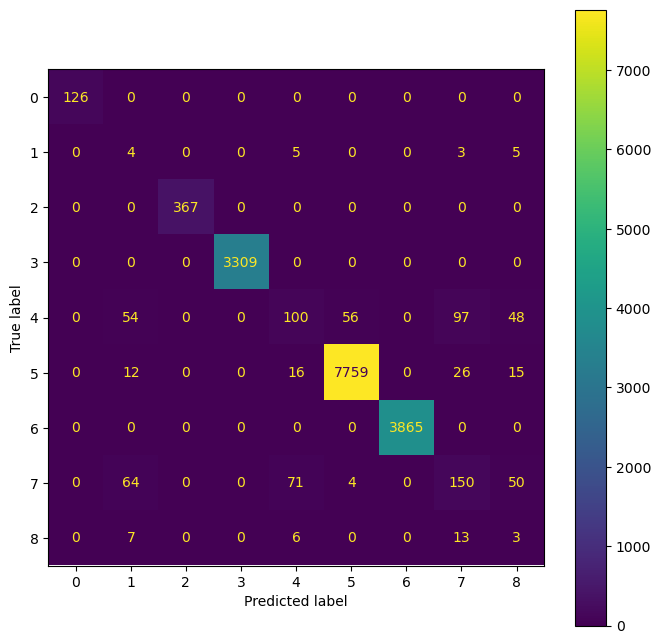

<Figure size 800x800 with 0 Axes>

In [65]:
disp =  ConfusionMatrixDisplay(cmX)
disp.plot()
fig = plt.figure()
plt.rcParams["figure.figsize"] = (8, 8)
plt.show()

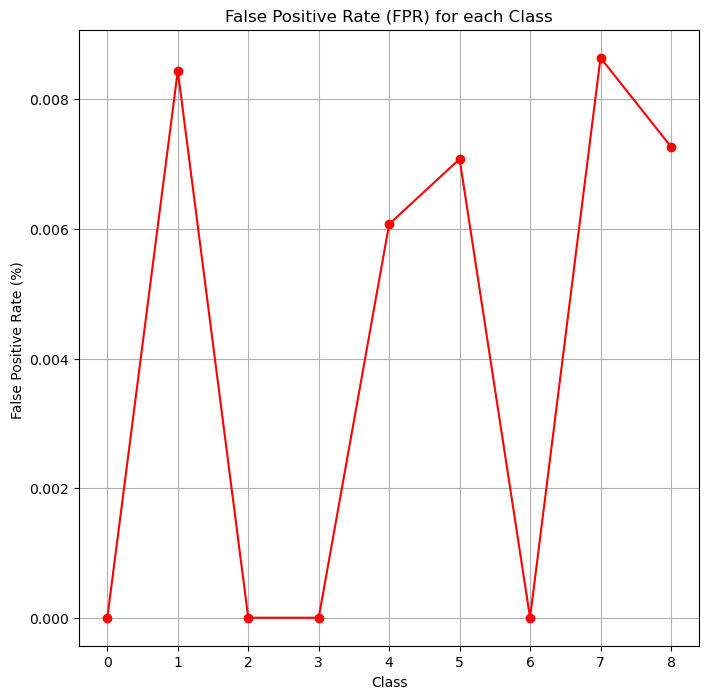

In [66]:
false_negatives = np.diag(cmX) - np.sum(cmX, axis=1)

# Calculate the rate of false negatives for each class
false_neg_rate = false_negatives / np.sum(cmX, axis=1)

# Calculate the False Positive Rate (FPR) for each class
FP = cmX.sum(axis=0) - np.diag(cmX)
TN = cmX.sum() - (FP + np.diag(cmX))
FPR = FP / (FP + TN)

# Plot the FPR for each class
classes = np.unique(y)
plt.plot(classes, FPR, marker='o', linestyle='-',  color='red')
plt.xlabel('Class')
plt.ylabel('False Positive Rate (%) ')
plt.title('False Positive Rate (FPR) for each Class')
plt.xticks(classes)
plt.grid(True)
plt.show()

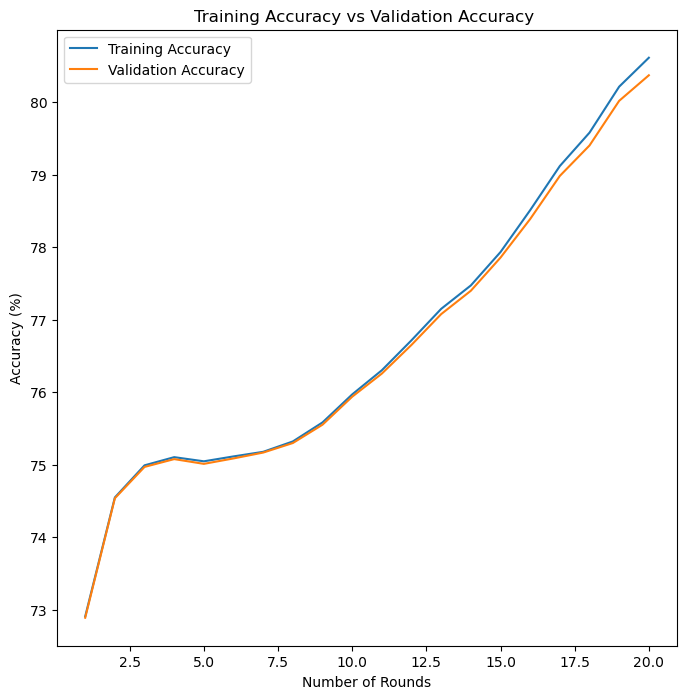

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
import plotly.graph_objects as go 

param_range = np.arange(1, 21)

# compute the training and validation scores for each value of n_estimators
train_scores, valid_scores = validation_curve(XGB, X_train_oversampled, y_train_oversampled, param_name='n_estimators', param_range=param_range,
                                              cv=10, scoring='accuracy')

# plot the mean training and validation scores for each value of n_estimators
plt.plot(param_range, np.mean(train_scores, axis=1) * 100, label='Training Accuracy')
plt.plot(param_range, np.mean(valid_scores, axis=1) * 100, label='Validation Accuracy')
plt.xlabel('Number of Rounds')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy vs Validation Accuracy ')
plt.legend()
plt.show()

In [ ]:
print(np.mean(train_scores))

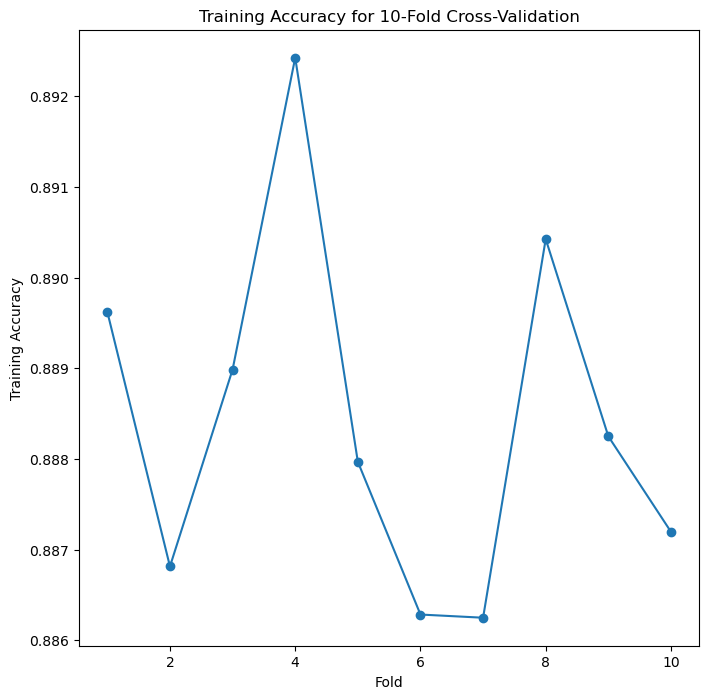

In [72]:
from sklearn.model_selection import cross_val_score

train_acc_scores = cross_val_score(estimator=XGB, X=X_train_oversampled, y=y_train_oversampled, cv=10, scoring='accuracy')

# plot the training accuracy for each fold
plt.plot(np.arange(1,11), train_acc_scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy for 10-Fold Cross-Validation')
plt.show()

In [71]:
from sklearn.model_selection import cross_val_score

acc_v = cross_val_score(estimator=XGB, X=X_train_oversampled, y=y_train_oversampled, cv=10)
print("scores for each fold")
for val in acc_v:
    print(val)

scores for each fold
0.8896217809276542
0.8868149603536594
0.8889863513560927
0.8924248271990457
0.8879688431984842
0.8862846917652012
0.8862496052770078
0.890424897372022
0.8882495351040315
0.8871969404582295


In [74]:
print(np.mean(acc_v))
print()
print(np.std(acc_v))

0.8884222433011428

0.0018814360860715655


In [57]:
pre_v = cross_val_score(estimator=XGB, X=X_train_oversampled, y=y_train_oversampled, cv=10, scoring='precision_micro')
print("precision for each fold")
for val_p in pre_v:
    print(val_p)

precision for each fold
0.8896217809276542
0.8868149603536594
0.8889863513560927
0.8924248271990457
0.8879688431984842
0.8862846917652012
0.8862496052770078
0.890424897372022
0.8882495351040315
0.8871969404582295


In [58]:
print(np.mean(pre_v))
print()
print(np.std(pre_v))

0.8884222433011428

0.0018814360860715655


In [60]:
rec_v = cross_val_score(estimator=XGB, X=X_train_oversampled, y=y_train_oversampled, cv=10, scoring='recall_micro')
print("Recall for each fold")
for val_c in rec_v:
    print(val_c)

Recall for each fold
0.8896217809276542
0.8868149603536594
0.8889863513560927
0.8924248271990457
0.8879688431984842
0.8862846917652012
0.8862496052770078
0.890424897372022
0.8882495351040315
0.8871969404582295


In [61]:
print(np.mean(rec_v))
print()
print(np.std(rec_v))

0.8884222433011428

0.0018814360860715655


In [62]:
f1_v = cross_val_score(estimator=XGB, X=X_train_oversampled, y=y_train_oversampled, cv=10, scoring='f1_micro')
print("F1_Score for each fold")
for val_f in f1_v:
    print(val_f)

F1_Score for each fold
0.8896217809276542
0.8868149603536594
0.8889863513560927
0.8924248271990457
0.8879688431984842
0.8862846917652012
0.8862496052770078
0.890424897372022
0.8882495351040314
0.8871969404582294


[0]	train-mlogloss:1.94441	validation-mlogloss:1.82779
[1]	train-mlogloss:1.77415	validation-mlogloss:1.58483
[2]	train-mlogloss:1.64291	validation-mlogloss:1.40220
[3]	train-mlogloss:1.53651	validation-mlogloss:1.25346
[4]	train-mlogloss:1.44713	validation-mlogloss:1.13100
[5]	train-mlogloss:1.37003	validation-mlogloss:1.02931
[6]	train-mlogloss:1.30297	validation-mlogloss:0.93943
[7]	train-mlogloss:1.24394	validation-mlogloss:0.86293
[8]	train-mlogloss:1.19022	validation-mlogloss:0.79554
[9]	train-mlogloss:1.14322	validation-mlogloss:0.73386
[10]	train-mlogloss:1.10012	validation-mlogloss:0.68264
[11]	train-mlogloss:1.06208	validation-mlogloss:0.63379
[12]	train-mlogloss:1.02681	validation-mlogloss:0.59002
[13]	train-mlogloss:0.99556	validation-mlogloss:0.55283
[14]	train-mlogloss:0.96669	validation-mlogloss:0.51915
[15]	train-mlogloss:0.93995	validation-mlogloss:0.48762
[16]	train-mlogloss:0.91612	validation-mlogloss:0.46003
[17]	train-mlogloss:0.89376	validation-mlogloss:0.43666
[1

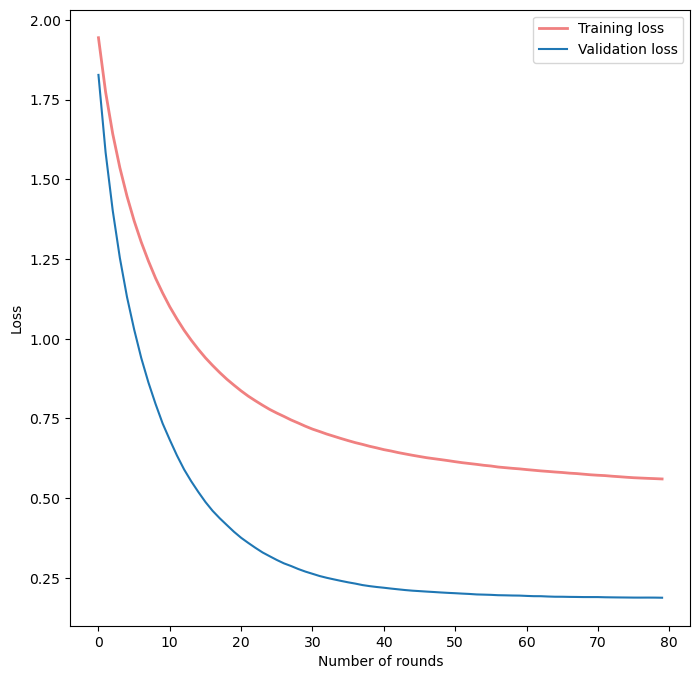

In [59]:
params = {
    'objective': 'multi:softmax',
    'num_class': 9,  # set to number of classes in your problem
    'max_depth': 3,
    'eta': 0.1,
    'subsample': 0.5
}

# Convert data to XGBoost DMatrix format
dtrain = xgboost.DMatrix(X_train_oversampled, label=y_train_oversampled)
dval = xgboost.DMatrix(X_test, label=y_test)

# Train XGBoost model
num_rounds = 80
eval_list = [(dtrain, 'train'), (dval, 'validation')]
evals_result = {}
bst = xgboost.train(params, dtrain, num_rounds, eval_list,  evals_result=evals_result)

# Extract training and validation loss from the evaluation results
train_loss = evals_result['train']['mlogloss']
val_loss = evals_result['validation']['mlogloss']

# Plot training and validation loss
plt.plot(train_loss, label='Training loss', linewidth=2.0,color='lightcoral')
plt.plot(val_loss, label='Validation loss')
plt.xlabel('Number of rounds')
plt.ylabel('Loss')
plt.legend()
plt.show()